# Regresión logística

Hasta ahora, hemos construído modelos supervisados de **regresión**, es decir, modelos en los que la salida de la función que aprendemos es numérica. Esta semana haremos nuestros primeros modelos de **clasificación**, en los que la salida es categórica, utilizando regresión logística.

Véamos un ejemplo. Tenemos un dataset con dos columnas, `horas_estudio` y `resultado_examen`. `horas_estudio` es una variable numérica que representa el número de horas que un estudiante le ha dedicado a prepararse para un examen, mientras que `resultado_examen` es una variable binaria que puede tomar uno de los varlores `APROBADO` o `REPROBADO`. 

| `horas_estudio` | `resultado_examen` |
| --------------- | ------------------ |
| 0 | `REPROBADO` |
| 7 | `APROBADO` |
| 3 | `REPROBADO` |
| 4 | `APROBADO` |
| ... | ... |
| 2 | `REPROBADO` |

Nuestro objetivo es **crear un modelo para determinar si un estudiante aprobará o no el examen**, utilizando como entrada el número de horas que ha dedicado a prepararse. Específicamente, aprenderemos una función $f(\texttt{horas}\_\texttt{estudio}) \mapsto \left[0, 1\right]$ que devuelve la probabilidad de que el resultado del examen sea `APROBADO`. 

In [2]:
# Ejecutemos esta celda para cargar el dataset y las bibliotecas básicas
import matplotlib.pyplot as plt
import numpy as np
import math

horas_estudio = [5, 4, 1, 1, 1, 2, 3, 3, 2, 0, 3, 3, 2, 3, 2, 3, 1, 5, 4, 4, 3, 4, 2, 4, 3, 3, 6, 4, 4, 5, 3, 4, 3, 2, 6, 2, 4, 4, 1, 5, 3, 3, 5, 7, 4, 3, 5, 2, 3, 5, 3, 4, 3, 3, 1, 3, 6, 0, 4, 3, 7, 2, 5, 3, 3, 4, 3, 1, 5, 4, 1, 4, 3, 1, 2, 4, 2, 2, 2, 2, 4, 3, 3, 1, 4, 2, 1, 0, 4, 4, 3, 3, 4, 6, 5, 3, 2, 2, 6, 6]
resultado_examen = ['APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'APROBADO', 'REPROBADO', 'REPROBADO', 'APROBADO', 'APROBADO']

### Notas importantes

- El nombre _regresión_ logística suele confundir. Estrictamente *sí* es un modelo de regresión que modela una variable numérica (la probabilidad), pero lo utilizamos para construir un clasificador
- La regresión logística es un **modelo probabilístico** (la función que aprendemos retorna una probabilidad). Otros modelos, p.ej. los árboles de decisión, producen directamente las etiquetas
- La regresión logística modela una salida binaria, p.ej. `APROBADO`/`REPROBADO`, `TRUE`/`FALSE`. Para más de dos categorías, el modelo general es la **regresión Softmax** que estudiaremos más adelante
- Un detalle importante en un modelo probabilístico es el "threshold" o **valor que marca la frontera entre una etiqueta de clasificación y la otra**. Esto lo estudiaremos con más detalle en el notebook sobre curvas ROC. Por ahora, fijaremos este valor en 0.5 ya que es el número en el que la probabilidad de una clase domina a la otra.  

## Ingredientes para regresión logística

Usaremos como base la función lineal de regresión $f(x) = \beta_0 + \beta_1 x$, con dos ingredientes adicionales:

1. Una función de enlace o activación que nos garantiza que la salida estará entre 0 y 1
2. Una función de error para minimizar, adecuada al tipo de datos binario de la salida.

### La función logística

Existe una familia entera de funciones llamadas sigmoides. Se les llama de esta manera porque al graficarlas producen una **línea en forma de "S"**. La función logística es una de ellas. De hecho, en mucha de la literatura de Machine Learning se le conoce simplemente como "función sigmoide". Se define de la siguiente manera: $$\mathrm{sig} \left(x \right) = \frac{1}{1 + e^{-x}}$$

Su derivada con es $$\mathrm{sig}' \left(x \right) = \mathrm{sig} \left(x \right) \left(1 - \mathrm{sig} \left( x \right) \right)$$


In [13]:
# Definamos la función logística (sigmoide) y su derivada
def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

def d_sig(x):
    return sig(x) * (1.0 - sig(x))

la función d_sig(0) es 0.25


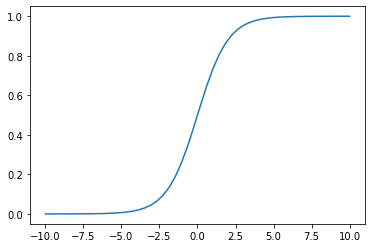

In [14]:
# Grafiquemos la función logística. 
# Notemos cómo el valor del eje 'y' está entre 0 y 1. Notemos también que sig(0)=0.5
x_val = np.linspace(-10, 10)
plt.plot(x_val, sig(x_val))

print("la función d_sig(0) es", d_sig(0))

### La función de entropía cruzada

El segundo ingrediente para hacer regresión logística es tener una función de error que tome el lugar de MSE y sea **más adecuada para una respuesta binaria**. Para esto, denotemos la variable $y$ como un valor original obtenido del dataset y supongamos que dichos valores han sido codificados adecuadamente (siguiendo nuestro ejemplo, `1="APROBADO"` y `0="REPROBADO"`). 

In [21]:
# Codifiquemos la variable 'resultado_examen' de modo que APROBADO=1.0 y REPROBADO=0.0
resultado_examen_enc = np.array([1.0 if y == 'APROBADO' else 0.0 for y in resultado_examen])
resultado_examen_enc

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

De manera similar, denotemos la variable $\hat{y}$ como una predicción realizada por nuestro modelo. A diferencia de $y$, que puede tomar solo los valores 0 o 1, $\hat{y}$ puede tomar cualquier valor en el intervalo $[0,1]$. Queremos **cuantificar el error de predecir $\hat{y}$ cuando el valor real es $y$**, así $$\mathrm{bce}\left(y, \hat{y} \right)=\begin{cases}-\textrm{log}(\hat{y}) &\textrm{si } y=1 \\ -\textrm{log}(1 - \hat{y}) &\textrm{si } y=0\end{cases}$$

**Nota**: aquí $\textrm{log}$ se refiere a la función de logaritmo natural. Para referirnos a la función logística, usaremos el término $\textrm{sig}$.

Tratemos de entender lo que sucede aquí. Cuando el valor real $y=1$, el error de nuestra predicción $\hat{y}$ tenderá a cero a medida que $\hat{y} \rightarrow 1$, al mismo tiempo que tenderá a infinito a medida que $\hat{y} \rightarrow 0$. Lo mismo sucede vice-versa cuando $y=0$.

In [22]:
# Probemos la función de error de entropía cruzada con distintos valores
def bce_simple(y_real, y_pred):
    if math.isclose(y_real, 1.0):
        return -math.log(y_pred)
    
    return -math.log(1.0 - y_pred)

for rv in [1.0, 0.0]:
    print(' ')
    for pv in [0.99, 0.8, 0.5, 0.2, 0.01]:
        print('Cuando y_real =', rv, '| y_pred =', pv, '\t--> error =', bce_simple(rv, pv))

 
Cuando y_real = 1.0 | y_pred = 0.99 	--> error = 0.01005033585350145
Cuando y_real = 1.0 | y_pred = 0.8 	--> error = 0.2231435513142097
Cuando y_real = 1.0 | y_pred = 0.5 	--> error = 0.6931471805599453
Cuando y_real = 1.0 | y_pred = 0.2 	--> error = 1.6094379124341003
Cuando y_real = 1.0 | y_pred = 0.01 	--> error = 4.605170185988091
 
Cuando y_real = 0.0 | y_pred = 0.99 	--> error = 4.605170185988091
Cuando y_real = 0.0 | y_pred = 0.8 	--> error = 1.6094379124341005
Cuando y_real = 0.0 | y_pred = 0.5 	--> error = 0.6931471805599453
Cuando y_real = 0.0 | y_pred = 0.2 	--> error = 0.2231435513142097
Cuando y_real = 0.0 | y_pred = 0.01 	--> error = 0.01005033585350145


Esta función de error se puede representar también de la forma $$\mathrm{bce}(y, \hat{y}) = -y \mathrm{log}(\hat{y}) - (1-y) \mathrm{log}(1 - \hat{y})$$
siendo su derivada con respecto a $\hat{y}$ $$\frac{\partial \mathrm{bce}(y, \hat{y})}{\partial \mathrm{\hat{y}}} = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}.$$

Para efectos de un dataset compuesto por $N$ observaciones, la función de error sería $$\mathrm{bce}(\mathbf{y}, \mathbf{\hat{y}}) = \sum_{i=1}^{N} -y_i \mathrm{log}(\hat{y_i}) - (1-y_i) \mathrm{log}(1 - \hat{y_i})$$

In [23]:
# Definamos la función de error de entropía cruzada para dataset enteros representados como arreglos de numpy
def bce(y_real, y_pred):
    return np.sum(-y_real*np.log(y_pred) - (1.0 - y_real)*np.log(1.0 - y_pred))

def d_bce(y_real, y_pred):
    return (y_pred - y_real) / (y_pred * (1.0-y_pred))

### Mezclando los ingredientes

Ya hemos definido los dos ingredientes adicionales para hacer regresión logística. Volvamos al planteamiento inicial sobre la ecuación de regresión $f(x) = \beta_0 + \beta_1 x$. En regresión logística, extendemos esta ecuación con la función logística, teniendo así el modelo $$g(x) = \mathrm{sig} \left( \beta_0 + \beta_1 x \right).$$
Nuestro objetivo de optimización es **encontrar los valores de $\beta_0$ y $\beta_1$** que minimizan el valor de la función objetivo $\mathbf{bce}$ sobre un dataset dado.

## Estimación de parámetros 

Volvamos a nuestro ejemplo del exámen y las horas de estudio.

In [24]:
# Definamos nuestro diccionario global de parámetros.
dic_param = {
    'beta1': 0.0,
    'beta0': 0.0,
}

# Definamos nuestro diccionario global de constantes
dic_const = {
    'threshold': 0.5, # frontera límite de clasificación--si valor es mayor, clasifica como APROBADO.
    'lr': 0.01, # tasa de aprendizaje para gradiente descendiente (cc cpmo Alpha/Alfa)
    'num_iter': 500 # número de iteraciones
}

# Retorna la probabilidad de APROBADO
def prob_aprobado(horas_estudio_x):    
    return sig(horas_estudio_x * dic_param['beta1'] + dic_param['beta0'])

# Retorna la etiqueta APROBADO/REPROBADO
def label_aprobado(horas_estudio):
    return 'APROBADO' if prob_aprobado(horas_estudio) > dic_const['threshold'] else 'REPROBADO'

Para encontrar los valores de $\beta_0$ y $\beta_1$, utilizaremos el algoritmo de gradiente descendiente. La manera estándar de hacerlo es encontrando las derivadas de la función de costo contra $\alpha$ y $\beta$ utilizando la regla de la cadena de cálculo: 
$$\frac{\partial \mathrm{bce}(y, \hat{y})}{\partial \beta_1} = \frac{\partial \mathrm{bce}(y, \hat{y})}{\partial \hat{y}} \times \frac{\partial \hat{y}}{\partial f} \times \frac{\partial f}{\partial \beta_1}$$
y del mismo modo con $\beta_0$. Lo interesante es que **nosotros no tenemos que encontrar esta derivada simbólicamente**, sino simplemente multiplicar los valores numéricos resultantes de evaluar por separado las derivadas de las funciones de regresión, error y activación, teniendo estas últimas dos ya implementadas como ``d_sig`` y ``d_bce``. Como veremos más adelante, este "truco" es la base del algoritmo *backpropagation* que se utiliza para encontrar los parámetros de las redes neuronales. Aunque nos falta implementar las derivadas de $f(x)$ para $\beta_0$ y $\beta_1$, estas son $x$ y $1$, respectivamente. 

In [25]:
# Función para calcular los gradientes de b0 y b1, los devuelve como una tupla de la forma (b1,b0)
# Recibe el dataset (x, y_real) y los valores actuales de b1 y b0
def grads(x, y_real, cur_b1, cur_b0):
    
    # Calculamos el valor la función de regresión
    f_val = x * cur_b1 + cur_b0
    
    # Generamos nuestra predicción
    y_pred = sig(f_val)
    
    # Obtenemos el gradiente del error de dicha predicción
    d_err = d_bce(y_real, y_pred)
    
    # Obtenemos el gradiente de la logística 
    d_f_val = d_sig(f_val)
    
    # Y los gradientes con respecto a b1 y b0 usando la regla de la cadena
    # Los sumamos para obtener un gradiente escalar que podemos utilizar en nuestra actualización de parámetros
    d_b1 = np.sum(d_err * d_f_val * x)
    d_b0 = np.sum(d_err * d_f_val)
    
    return (d_b1, d_b0)

¡Ya tenemos todo listo para armar nuestro algoritmo de gradiente descendiente!

In [26]:
def gd(x, y):
    
    # Inicializamos alpha y beta utilizando una distribución normal estándar
    [b1, b0] = np.random.randn(2)
    lr = dic_const['lr']
    
    # Lista de error por iteración (para graficar)
    errs = []
    
    for i in range(dic_const['num_iter']):
        
        # Calculamos las predicciones y el error para todo el dataset
        pred = sig(b1*x + b0)
        err = bce(y, pred)
        
        # Calculamos los gradientes
        (d_b1, d_b0) = grads(x, y, b1, b0)
        
        # Actualizamos los parámetros usando los gradientes y la tasa de aprendizaje
        b1 = b1 - lr * d_b1
        b0 = b0 - lr * d_b0
        
        # Guardamos el error de esta iteración
        errs.append(err)
        
    
    # Actualizamos los valores de los parámetros para salida
    dic_param['beta1'] = b1
    dic_param['beta0'] = b0
    
    return errs

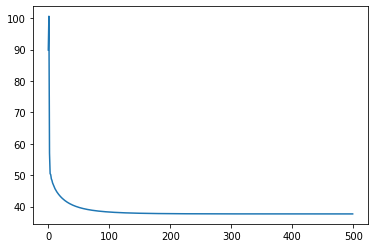

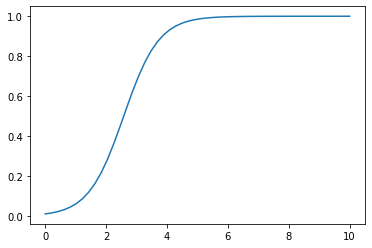

In [27]:
# Ejecutamos nuestra optimización con descenso de gradientes y graficamos la curva de error entre iteraciones
errs = gd(np.array(horas_estudio), resultado_examen_enc)
plt.plot(errs)
plt.show()

# Probamos nuestro modelo contra distintas horas de estudio y graficamos la probabilidad
hora_test = np.linspace(0, 10)
hora_prob = prob_aprobado(hora_test)
plt.plot(hora_test, hora_prob)
plt.show()

In [28]:
# Realizamos una prediccion:
horas = 3.5
hora_prob = prob_aprobado(horas)
pred = label_aprobado(horas)

print("Si ud estudia durante",horas, 
      "horas, ud tiene una probabilidad de pasar de",hora_prob,"lo que indica que estara",pred)

print("Coeficientes b0:",dic_param['beta0'], "b1:",dic_param['beta1'])
print("BCE:", errs[len(errs)-1])

Si ud estudia durante 3.5 horas, ud tiene una probabilidad de pasar de 0.8326475285642749 lo que indica que estara APROBADO
Coeficientes b0: -4.466837030812945 b1: 1.7346700722407113
BCE: 37.65195677278731


In [29]:
# Revisar la prediccion sobre el dataset. (warning: hacer esto en train/test set en las practicas)

# variable dependiente (prediccion)
y_prima = [label_aprobado(p) for p in horas_estudio]

# variable dependiente
y = resultado_examen

# exactitud
acc = np.sum((np.array(y_prima) == np.array(y)) * 1) / len(y)

print("El algoritmo puede predecir el dataset completo con una exactitud del ", acc * 100,"%")

El algoritmo puede predecir el dataset completo con una exactitud del  92.0 %


## Regresión logística multivariable

Ya que tenemos nuestro primer modelo, vamos a hacer una extensión importante: multiples variables de entrada. Supongamos, que además de ``horas_estudio``, tenemos otras variables adicionales en nuestro dataset: ``horas_sueno`` y ``num_repeticiones`` que representan respectivamente el número de horas de sueño antes de tomar el examen, y el número de veces que el estudiante ha tomado el examen anteriormente (``0`` si es la primera vez que lo toma). De modo que ahora la función que debemos aprender es $f\left(\texttt{horas}\_\texttt{estudio}, \texttt{horas}\_\texttt{sueno}, \texttt{num}\_\texttt{repeticiones} \right) \mapsto \left[0, 1 \right]$.

Esto cambia el problema de varias maneras:

1. $\mathbf{x}$ en nuestro dataset pasa de ser un vector de $N$ valores, a una matriz $X$ de $N \times 3$
2. $\beta_i$ pasa de ser un valor escalar y se convierte en un vector $\boldsymbol{\beta}$ de $3$ valores.
3. Nuestro modelo es ahora $g(\mathbf{x}) = \mathrm{sig} \left(\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_0 \right) = \mathrm{sig}\left(\boldsymbol{\beta_i}^{\mathrm{T}}\mathbf{x} + \beta_0 \right)$

Veamos primero como quedan nuestros datos

In [33]:
# Dataset
horas_sueno = [4, 4, 5, 5, 4, 6, 7, 7, 5, 8, 5, 7, 7, 7, 7, 7, 4, 8, 4, 8, 6, 8, 5, 4, 5, 5, 7, 4, 6, 8, 6, 4, 7, 4, 5, 7, 7, 4, 6, 6, 5, 6, 7, 6, 4, 8, 7, 4, 4, 6, 5, 8, 6, 8, 4, 5, 4, 6, 8, 5, 6, 6, 5, 6, 4, 8, 4, 6, 5, 7, 5, 6, 7, 7, 8, 4, 4, 6, 8, 6, 4, 6, 5, 5, 5, 4, 4, 7, 8, 5, 4, 8, 5, 6, 5, 6, 7, 7, 4, 5]
repeticiones = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Combinamos los tres arreglos 'horas_estudio', 'horas_sueno' y 'repeticiones' en una matriz de Nx3
datos_mul = np.array((horas_estudio, horas_sueno, repeticiones)).transpose()

# Definimos un diccionario de parámetros nuevo para el caso multivariable
dic_param_mul = {
    'bi': np.array([0.0, 0.0, 0.0]), # ahora es un vector
    'b0': 0.0 # permanece igual
}

# Definamos nuestro diccionario global de constantes
dic_const_mul = {
    'threshold': 0.5, # frontera límite de clasificación--si valor es mayor, clasifica como APROBADO.
    'lr': 0.001, # tasa de aprendizaje para gradiente descendiente -- MAS PEQUEÑA EN ESTE CASO
    'num_iter': 1000 # número de iteraciones -- MÁS ALTA EN ESTE CASO
}


El cambio más importante viene a la hora de aplicar la función de regresión. Para poder multiplicar el vector $\boldsymbol{\beta_i}$ contra el vector de valores $\mathbf{x}$ y producir un valor escalar, utilizaremos la función ``numpy.dot``. Este cambio lo debemos hacer en nuestra función de evaluación de gradientes y en la de optimización gradiente descendiente.

In [34]:
# Función para calcular los gradientes de alpha y beta, los devuelve como una tupla de la forma (alpha,beta)
# Recibe el dataset (x, y_real) y los valores actuales de alpha y beta
def grads_mul(x, y_real, cur_bi, cur_b0):
    
    # Calculamos el valor la función de regresión
    # OBSERVEMOS ESTE CAMBIO contra la implementación anterior
    ### ANTES: f_val = x * cur_alpha + cur_beta
    ### AHORA:
    f_val = np.dot(x, cur_bi) + cur_b0
    
    # Generamos nuestra predicción
    y_pred = sig(f_val)
    
    # Obtenemos el gradiente del error de dicha predicción
    d_err = d_bce(y_real, y_pred)
    
    # Obtenemos el gradiente de la logística 
    d_f_val = d_sig(f_val)
    
    # Y los gradientes con respecto a alpha y beta usando la regla de la cadena
    # Los sumamos para obtener un gradiente escalar que podemos utilizar en nuestra actualización de parámetros
    ### ANTES: d_b1 = np.sum(d_err * d_f_val * x)
    ### AHORA:
    d_bi = np.dot(d_err * d_f_val, x)
    d_b0 = np.sum(d_err * d_f_val)
    
    return (d_bi, d_b0)

# Ahora cambiemos la función de obtención de gradientes
def gd_mul(x, y):
    
    # Inicializamos alpha y beta utilizando una distribución normal estándar
    # CAMBIO: los inicializamos ahora por separado
    bi = np.random.randn(3)
    [b0] = np.random.randn(1)
    lr = dic_const_mul['lr']
    
    # Lista de error por iteración (para graficar)
    errs = []
    
    for i in range(dic_const_mul['num_iter']):
        
        # Calculamos las predicciones y el error para todo el dataset
        # CAMBIO: función de regresión usando np.dot
        ### ANTES: pred = sig(alpha*x + beta)
        pred = sig(np.dot(x, bi) + b0)
        err = bce(y, pred)
        
        # Calculamos los gradientes
        ### CAMBIO: utilizamos 'grads_mul' en vez de 'grads'
        (d_bi, d_b0) = grads_mul(x, y, bi, b0)
        
        # Actualizamos los parámetros usando los gradientes y la tasa de aprendizaje
        bi = bi - lr * d_bi
        b0 = b0 - lr * d_b0
        
        # Guardamos el error de esta iteración
        errs.append(err)

    # Actualizamos los valores de los parámetros para salida
    dic_param_mul['betai'] = bi
    dic_param_mul['beta0'] = b0
    
    return errs

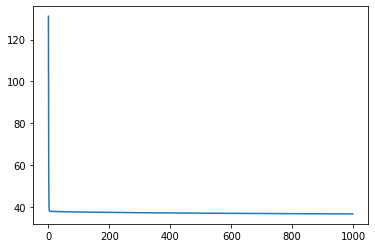

In [35]:
# Ejecutamos nuestro algoritmo de optimización y graficamos la evolución de nuestra función de error por cada iteración
errs = gd_mul(datos_mul, resultado_examen_enc)
plt.plot(errs)

In [ ]:
# EJERCICIO OPCIONAL:
# 1) imprima el valor de los coeficientes
# 2) imprima el ultimo valor del BCE
# 3) Calcule la exactitud de todo el dataset